In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'C:/Users/luis/Desktop/Carrer Foundry boot camp/Advanced Analytics & Dashboard Design/Data/Prepared Data/UFC data cleaned 6.1.csv'
ufc_data = pd.read_csv(file_path)

In [3]:
# List of columns to include in the new DataFrame
columns_needed = [
    'Winner', 'weight_class', 'location', 'date', 'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
    'B_avg_TD_landed', 'R_avg_TD_landed', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT', 'B_avg_KD', 'R_avg_KD',
    'B_avg_CTRL_time(seconds)', 'R_avg_CTRL_time(seconds)'
]

In [4]:
# Create the new DataFrame with the specified columns
df62 = ufc_data[columns_needed]

In [5]:
df62.head()

,Winner,weight_class,location,date,B_avg_SIG_STR_landed,R_avg_SIG_STR_landed,B_avg_TD_landed,R_avg_TD_landed,B_avg_SUB_ATT,R_avg_SUB_ATT,B_avg_KD,R_avg_KD,B_avg_CTRL_time(seconds),R_avg_CTRL_time(seconds)
0,Red,Bantamweight,"Las Vegas, Nevada, USA",2021-03-20,20.0000,17.000000,1.00,0.000000,0.500000,0.000000,0.000000,1.000000,34.000000,5.000000
1,Red,Middleweight,"Las Vegas, Nevada, USA",2021-03-20,35.0000,43.156250,1.50,0.781250,1.500000,0.250000,0.500000,1.031250,219.500000,176.156250
2,Red,Heavyweight,"Las Vegas, Nevada, USA",2021-03-20,29.6875,30.375000,0.75,0.000000,0.148468,0.000000,0.015625,0.546875,99.211914,82.453125
3,Blue,Women's Strawweight,"Las Vegas, Nevada, USA",2021-03-20,29.6875,30.500000,0.75,0.812500,0.148468,0.187500,0.015625,0.047168,99.211914,104.865234
4,Blue,Women's Bantamweight,"Las Vegas, Nevada, USA",2021-03-20,57.9375,44.362305,1.50,1.261719,0.125000,0.231445,0.125000,0.000000,390.250000,141.285156


# Correlation Map

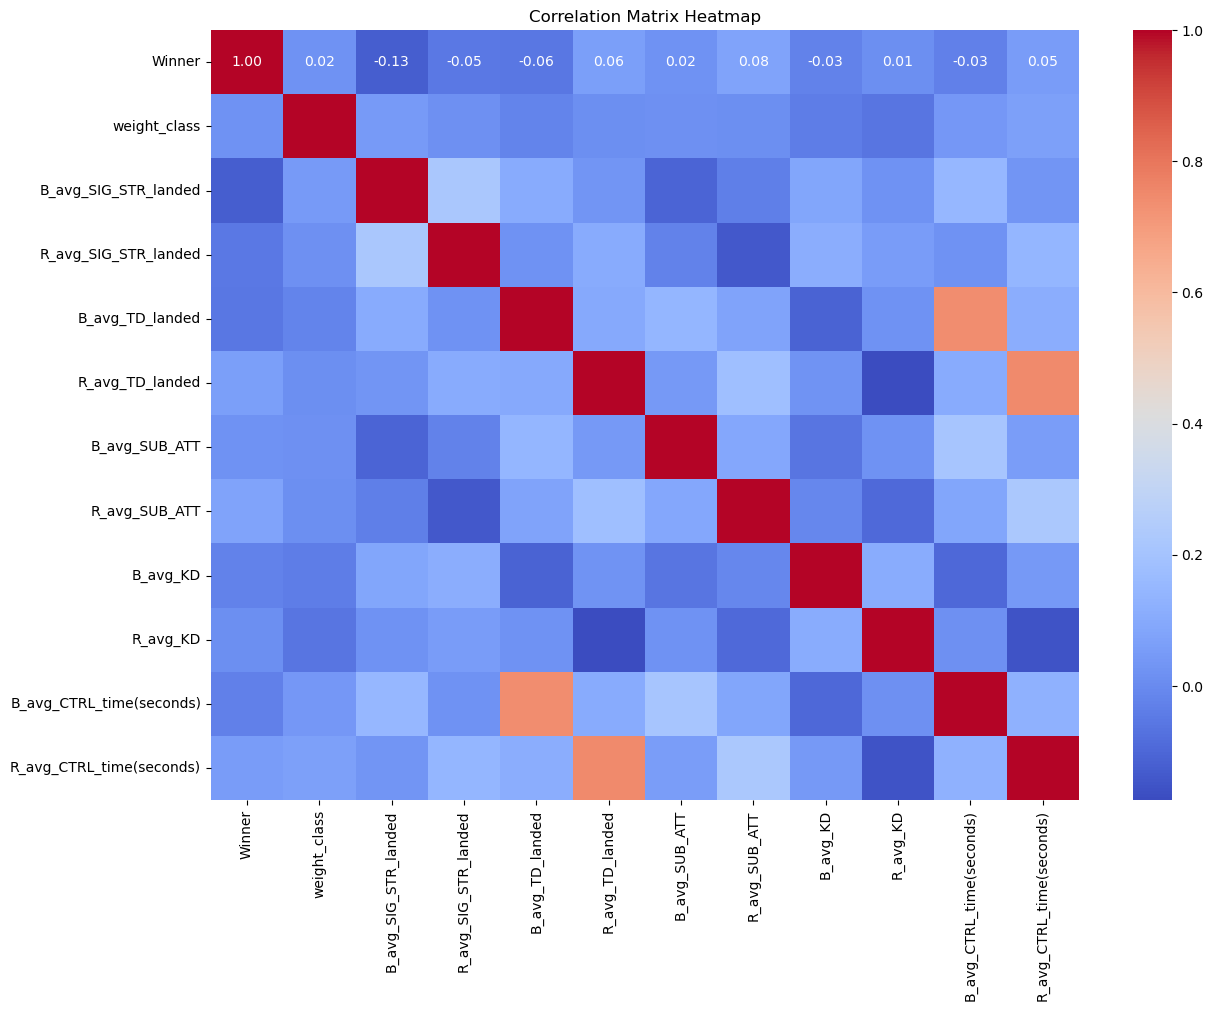

In [6]:
# List of columns to include in the new DataFrame for correlation analysis
columns_corr = [
    'Winner', 'weight_class', 'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
    'B_avg_TD_landed', 'R_avg_TD_landed', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
    'B_avg_KD', 'R_avg_KD', 'B_avg_CTRL_time(seconds)', 'R_avg_CTRL_time(seconds)'
]

# Create the new DataFrame with the specified columns
df62 = ufc_data[columns_corr].copy()

# Convert categorical data to numerical for correlation analysis
df62.loc[:, 'Winner'] = df62['Winner'].map({'Red': 1, 'Blue': 0})
df62.loc[:, 'weight_class'] = df62['weight_class'].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = df62.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Key Insights

## Winner Correlations
- **B_avg_SIG_STR_landed (-0.13)**: Negative correlation suggests that as the blue corner's average significant strikes landed increases, the likelihood of the red corner winning decreases slightly.
- **B_avg_CTRL_time(seconds) (0.03)**: Very weak positive correlation with the winner, indicating minimal influence.

## Weight Class Correlations
- Generally weak correlations with other variables, suggesting weight class does not strongly influence these performance metrics.

## Significant Strikes Landed
- **B_avg_SIG_STR_landed vs. R_avg_SIG_STR_landed (0.06)**: Very weak positive correlation, indicating a slight tendency for higher significant strikes landed by blue corner to correspond with higher significant strikes landed by red corner.
- **B_avg_SIG_STR_landed vs. B_avg_TD_landed (0.02)**: Very weak positive correlation, indicating a minimal relationship between significant strikes landed and takedowns landed by the blue corner.

## Takedowns Landed
- **B_avg_TD_landed vs. R_avg_TD_landed (0.08)**: Very weak positive correlation, indicating minimal relationship between takedowns landed by both corners.
- **B_avg_TD_landed vs. B_avg_CTRL_time(seconds) (0.03)**: Very weak positive correlation, suggesting that takedowns landed slightly relate to control time for the blue corner.

## Submission Attempts
- **B_avg_SUB_ATT vs. R_avg_SUB_ATT (0.03)**: Very weak positive correlation, indicating minimal relationship between submission attempts by both corners.

## Knockdowns
- **B_avg_KD vs. R_avg_KD (0.05)**: Very weak positive correlation, suggesting a minimal relationship between knockdowns by both corners.

## Control Time
- **B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds) (0.05)**: Very weak positive correlation, indicating minimal relationship between control times for both corners.

# Summary
- **Weak Correlations**: The correlations between the selected variables are generally weak, indicating that these performance metrics have minimal direct relationships with each other. This suggests that other factors may play more significant roles in influencing fight outcomes.
- **Implications for Prediction**: Due to the weak correlations, predicting fight outcomes based on these variables alone may be challenging, and a more comprehensive analysis incorporating additional variables and techniques may be necessary.

# Recommendations
- **Further Analysis**: Explore other potential factors and advanced analytical techniques, such as machine learning models, to better understand and predict fight outcomes.
- **Variable Selection**: Consider additional variables that might have stronger relationships with fight outcomes to improve the analysis and predictions.
- **Two Correlation Maps**: Create two separate correlation maps—one for fights where the red corner wins and another for fights where the blue corner wins. This will help to identify if there are different patterns or significant factors when comparing the two scenarios.

In [7]:
# Split data based on the winner
df_red_wins = df62[df62['Winner'] == 1]
df_blue_wins = df62[df62['Winner'] == 0]

# Compute the correlation matrices
correlation_matrix_red = df_red_wins.corr()
correlation_matrix_blue = df_blue_wins.corr()

C:\Users\luis\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


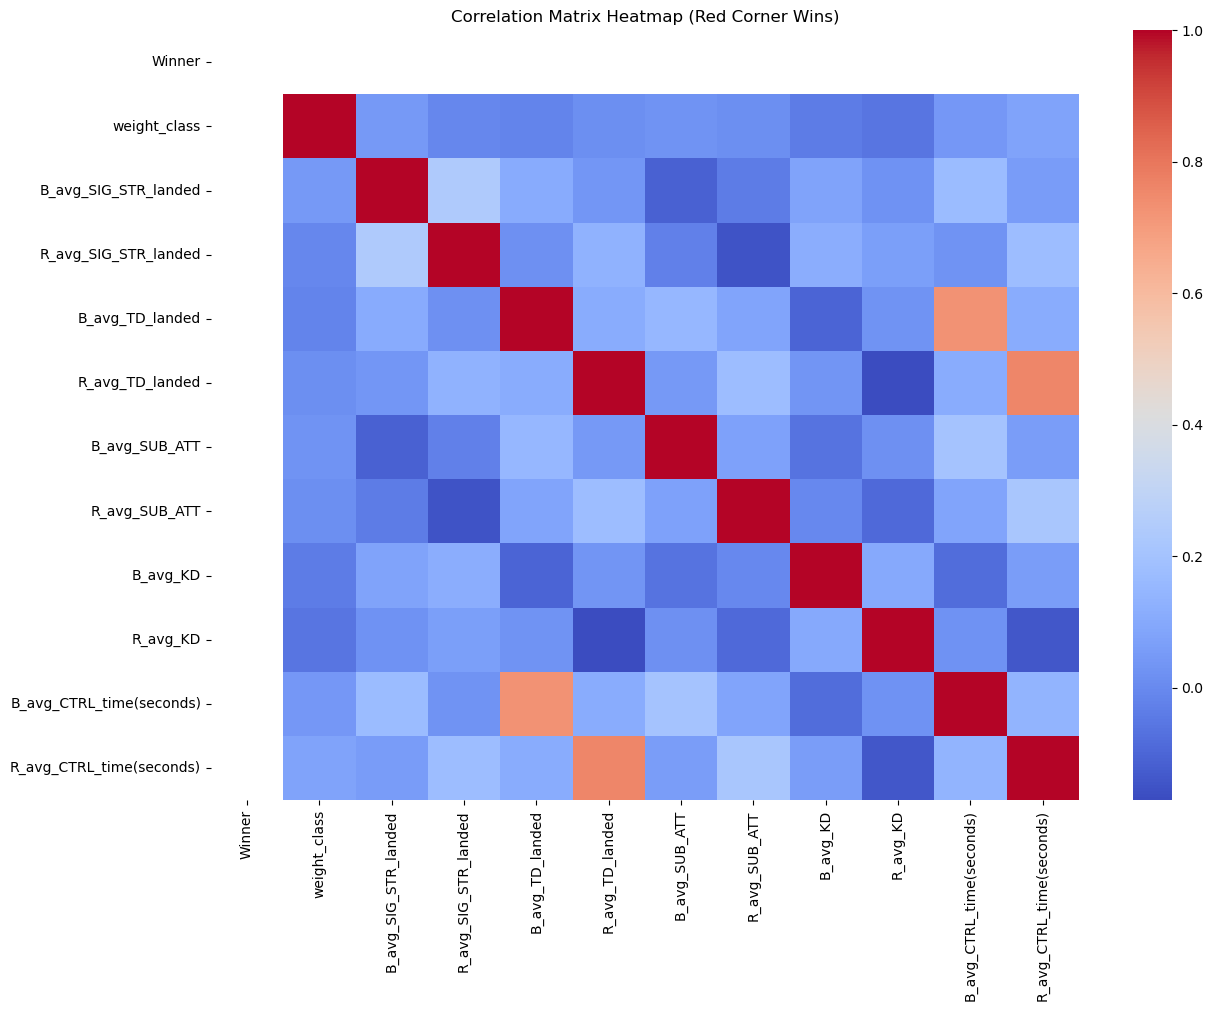

In [8]:
# Plot the heatmaps
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Red Corner Wins)')
plt.show()

C:\Users\luis\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


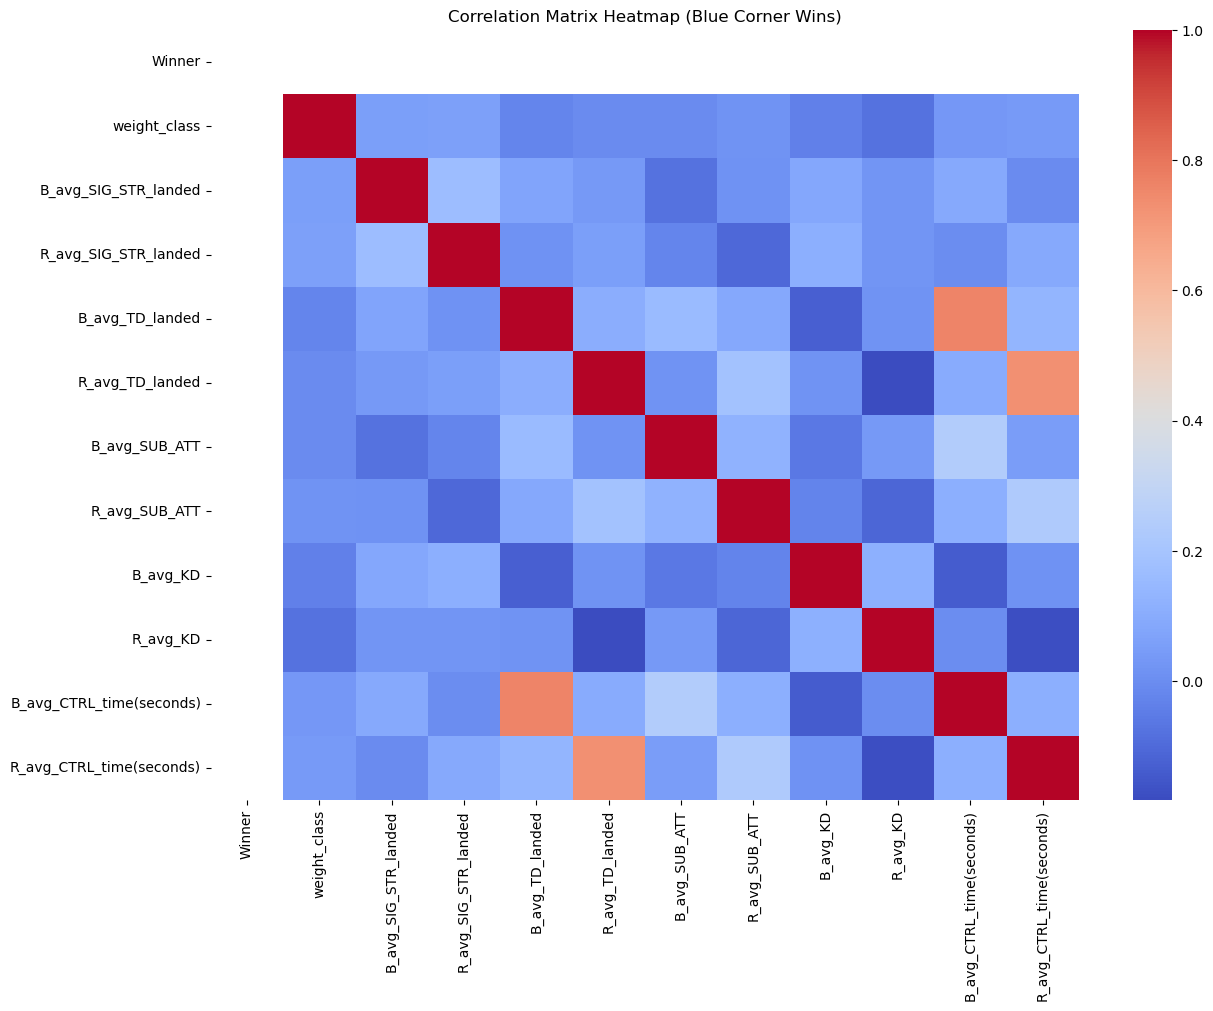

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_blue, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Blue Corner Wins)')
plt.show()

### Analysis of Correlation Matrix Heatmaps

#### Red Corner Wins Correlation Heatmap

- **B_avg_SIG_STR_landed (-0.11):** Slight negative correlation with the Winner, indicating that higher significant strikes landed by the blue corner are slightly associated with fewer wins by the red corner.
- **R_avg_SIG_STR_landed (0.01):** Very weak positive correlation, suggesting minimal impact of significant strikes landed by the red corner on winning.
- **B_avg_TD_landed (0.05):** Weak positive correlation with the Winner, indicating that more takedowns by the blue corner are slightly associated with red corner wins.
- **R_avg_TD_landed (0.01):** Very weak positive correlation, suggesting minimal impact of takedowns landed by the red corner on winning.
- **B_avg_SUB_ATT (-0.06):** Slight negative correlation, indicating that more submission attempts by the blue corner are slightly associated with fewer wins by the red corner.
- **R_avg_SUB_ATT (0.08):** Weak positive correlation, suggesting that more submission attempts by the red corner are slightly associated with wins.
- **B_avg_KD (-0.04):** Slight negative correlation, indicating that more knockdowns by the blue corner are slightly associated with fewer wins by the red corner.
- **R_avg_KD (0.08):** Weak positive correlation, suggesting that more knockdowns by the red corner are slightly associated with wins.
- **B_avg_CTRL_time(seconds) (0.03):** Very weak positive correlation with the Winner, indicating minimal influence of control time by the blue corner on red corner wins.
- **R_avg_CTRL_time(seconds) (0.05):** Very weak positive correlation, suggesting minimal impact of control time by the red corner on winning.

#### Blue Corner Wins Correlation Heatmap

- **B_avg_SIG_STR_landed (-0.13):** Slight negative correlation with the Winner, indicating that higher significant strikes landed by the blue corner are slightly associated with fewer wins by the blue corner.
- **R_avg_SIG_STR_landed (-0.02):** Very weak negative correlation, suggesting minimal impact of significant strikes landed by the red corner on blue corner wins.
- **B_avg_TD_landed (-0.06):** Weak negative correlation with the Winner, indicating that more takedowns by the blue corner are slightly associated with fewer wins by the blue corner.
- **R_avg_TD_landed (-0.05):** Slight negative correlation, suggesting minimal impact of takedowns landed by the red corner on blue corner wins.
- **B_avg_SUB_ATT (-0.07):** Slight negative correlation, indicating that more submission attempts by the blue corner are slightly associated with fewer wins by the blue corner.
- **R_avg_SUB_ATT (-0.08):** Weak negative correlation, suggesting that more submission attempts by the red corner are slightly associated with fewer blue corner wins.
- **B_avg_KD (-0.08):** Weak negative correlation, indicating that more knockdowns by the blue corner are slightly associated with fewer wins by the blue corner.
- **R_avg_KD (-0.01):** Very weak negative correlation, suggesting minimal impact of knockdowns by the red corner on blue corner wins.
- **B_avg_CTRL_time(seconds) (0.02):** Very weak positive correlation with the Winner, indicating minimal influence of control time by the blue corner on blue corner wins.
- **R_avg_CTRL_time(seconds) (0.01):** Very weak positive correlation, suggesting minimal impact of control time by the red corner on blue corner wins.

### Summary

- **Weak Correlations:** The correlations between the selected variables and the Winner are generally weak in both heatmaps, indicating that these performance metrics have minimal direct relationships with fight outcomes.
- **Implications for Prediction:** Due to the weak correlations, predicting fight outcomes based on these variables alone may be challenging, and a more comprehensive analysis incorporating additional variables and techniques may be necessary.

### Recommendations

- **Further Analysis:** Explore other potential factors and advanced analytical techniques, such as machine learning models, to better understand and predict fight outcomes.
- **Variable Selection:** Consider additional variables that might have stronger relationships with fight outcomes to improve the analysis and predictions.


# Scatter Plot

In [10]:
# List of columns to include in the new DataFrame for scatterplots
columns_scatter = [
    'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed', 
    'B_avg_TD_landed', 'R_avg_TD_landed',
    'B_avg_CTRL_time(seconds)', 'R_avg_CTRL_time(seconds)'
]

# Create the new DataFrame with the specified columns
df62 = ufc_data[columns_scatter].copy()

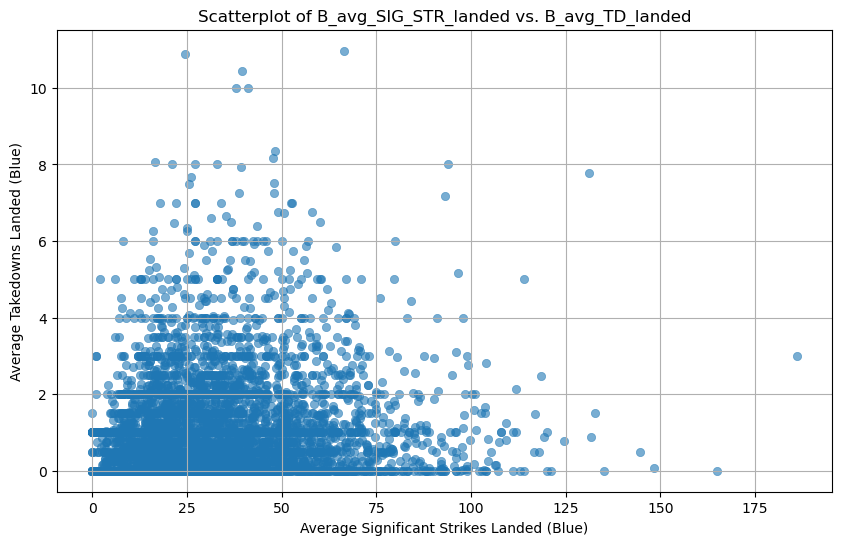

In [11]:
# scatter plot for B_avg_SIG_STR_landed vs. B_avg_TD_landed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='B_avg_SIG_STR_landed', y='B_avg_TD_landed', data=df62, alpha=0.6, edgecolor=None)
plt.title('Scatterplot of B_avg_SIG_STR_landed vs. B_avg_TD_landed')
plt.xlabel('Average Significant Strikes Landed (Blue)')
plt.ylabel('Average Takedowns Landed (Blue)')
plt.grid(True)
plt.show()

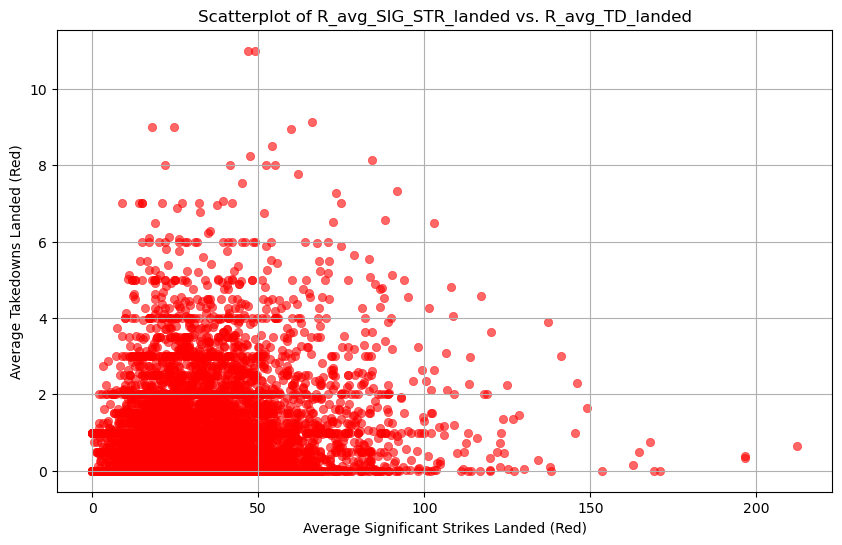

In [12]:
# Scatterplot for R_avg_SIG_STR_landed vs. R_avg_TD_landed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R_avg_SIG_STR_landed', y='R_avg_TD_landed', data=df62, color='red', alpha=0.6, edgecolor=None)
plt.title('Scatterplot of R_avg_SIG_STR_landed vs. R_avg_TD_landed')
plt.xlabel('Average Significant Strikes Landed (Red)')
plt.ylabel('Average Takedowns Landed (Red)')
plt.grid(True)
plt.show()

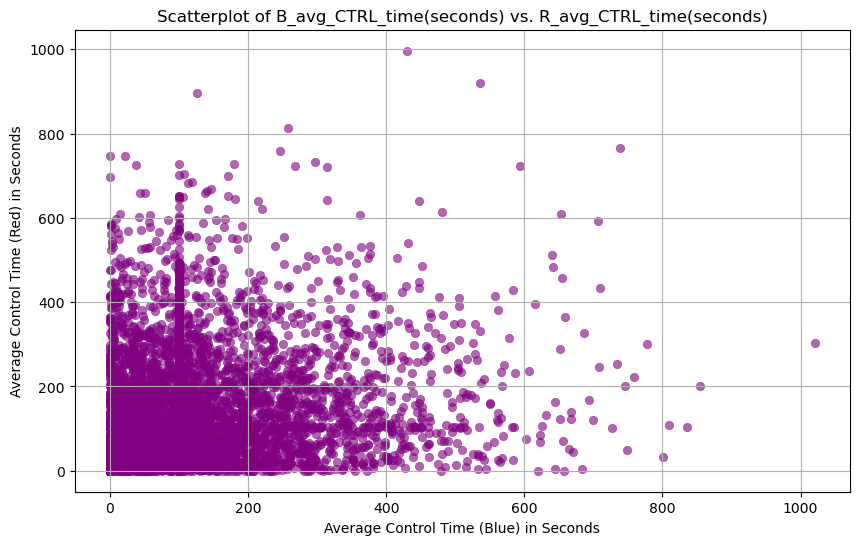

In [13]:
# Scatterplot for B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='B_avg_CTRL_time(seconds)', y='R_avg_CTRL_time(seconds)', data=df62, color='purple', alpha=0.6, edgecolor=None)
plt.title('Scatterplot of B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds)')
plt.xlabel('Average Control Time (Blue) in Seconds')
plt.ylabel('Average Control Time (Red) in Seconds')
plt.grid(True)
plt.show()

### Analysis of Scatterplots

#### Scatterplot of B_avg_SIG_STR_landed vs. B_avg_TD_landed
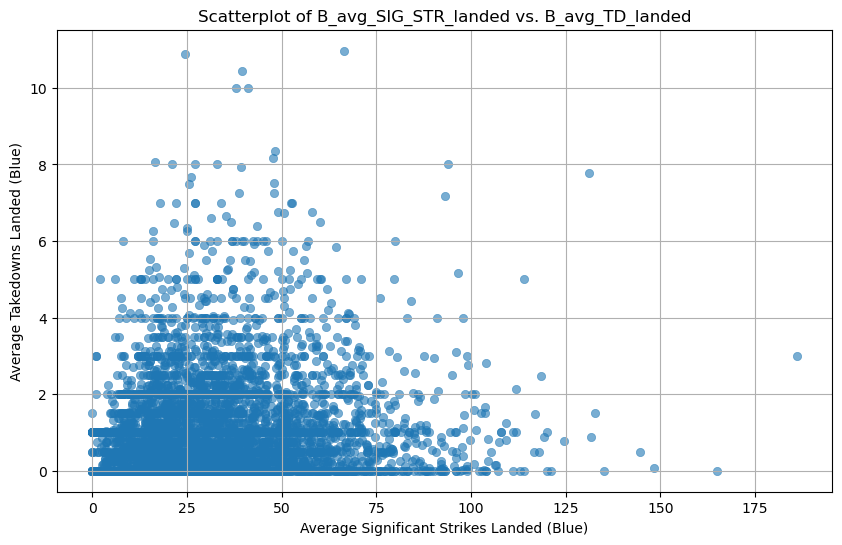
- **Overview:** This scatterplot visualizes the relationship between the average significant strikes landed and the average takedowns landed by the blue corner.
- **Observations:**
  - The majority of data points are clustered at lower values for both significant strikes and takedowns.
  - There is no clear linear relationship between the two variables.
  - Higher values for significant strikes do not necessarily correlate with higher takedowns, indicating varied fighting strategies and outcomes.

#### Scatterplot of R_avg_SIG_STR_landed vs. R_avg_TD_landed
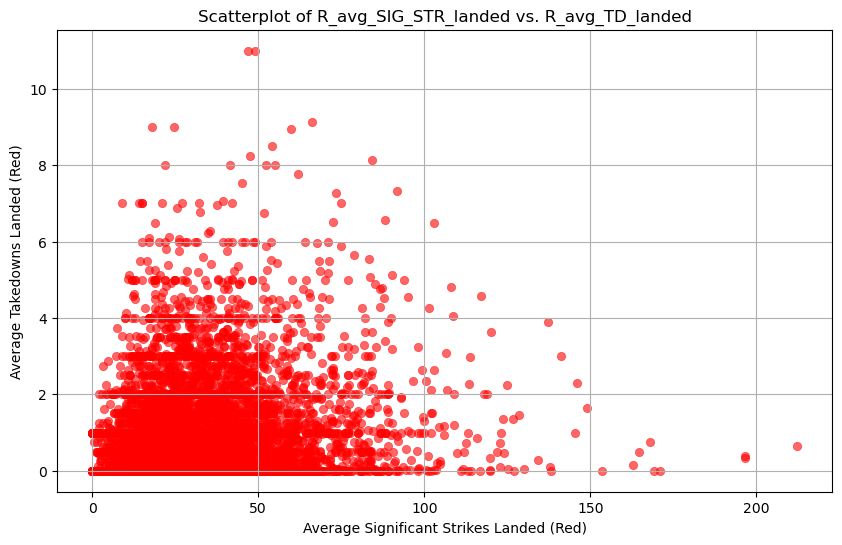
- **Overview:** This scatterplot shows the relationship between the average significant strikes landed and the average takedowns landed by the red corner.
- **Observations:**
  - Similar to the blue corner, most data points are clustered at lower values.
  - There is a slightly more spread out distribution compared to the blue corner, but still no clear linear relationship.
  - This suggests that, for the red corner as well, high significant strikes do not necessarily correlate with high takedowns.

#### Scatterplot of B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds)
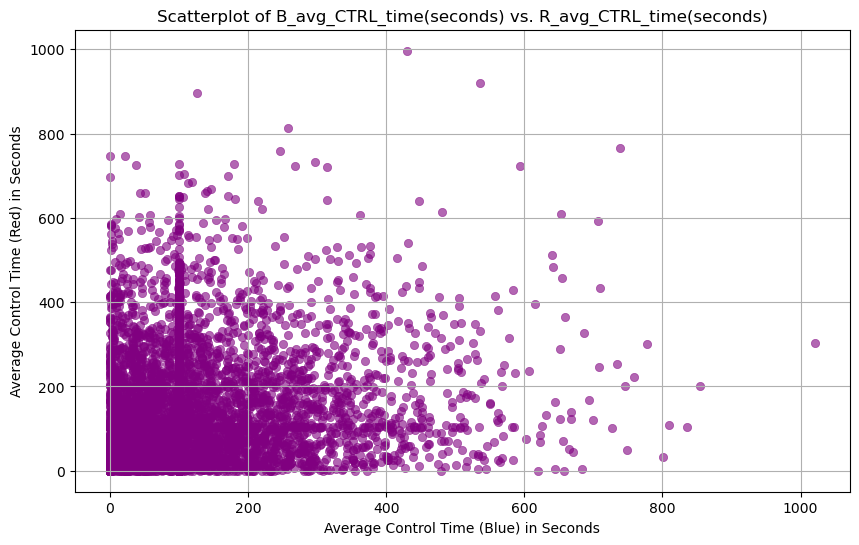
- **Overview:** This scatterplot examines the relationship between the average control time in seconds for the blue and red corners.
- **Observations:**
  - There is a dense cluster of data points at lower control times for both corners.
  - There are some points with high control time for one corner and low for the other, indicating dominance by one corner in those fights.
  - Overall, no strong linear relationship is observed, suggesting control time alone may not be a decisive factor in winning.

### Summary
- **General Trends:** Across all three scatterplots, the data points are densely packed at lower values, with no strong linear relationships evident between the pairs of variables.
- **Implications:** The lack of strong correlations in the scatterplots aligns with the weak correlations observed in the heatmaps. This indicates that these individual metrics (significant strikes, takedowns, control time) might not strongly predict fight outcomes when considered in isolation.
- **Further Analysis:** To gain more insights, it would be beneficial to look at combinations of these metrics or consider other factors such as fighter experience, strategy, and specific match conditions. Advanced analytical techniques like machine learning could also be employed to identify patterns and predictors of fight outcomes.


# Pair Plot

In [14]:
# List of columns to include in the pair plot
columns_pairplot = [
    'Winner', 'weight_class', 'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
    'B_avg_TD_landed', 'R_avg_TD_landed', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
    'B_avg_KD', 'R_avg_KD', 'B_avg_CTRL_time(seconds)', 'R_avg_CTRL_time(seconds)'
]

In [15]:
# Convert categorical data to numerical for the pair plot
df_pairplot = ufc_data[columns_pairplot].copy()
df_pairplot['Winner'] = df_pairplot['Winner'].map({'Red': 1, 'Blue': 0})
df_pairplot['weight_class'] = df_pairplot['weight_class'].astype('category').cat.codes

C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

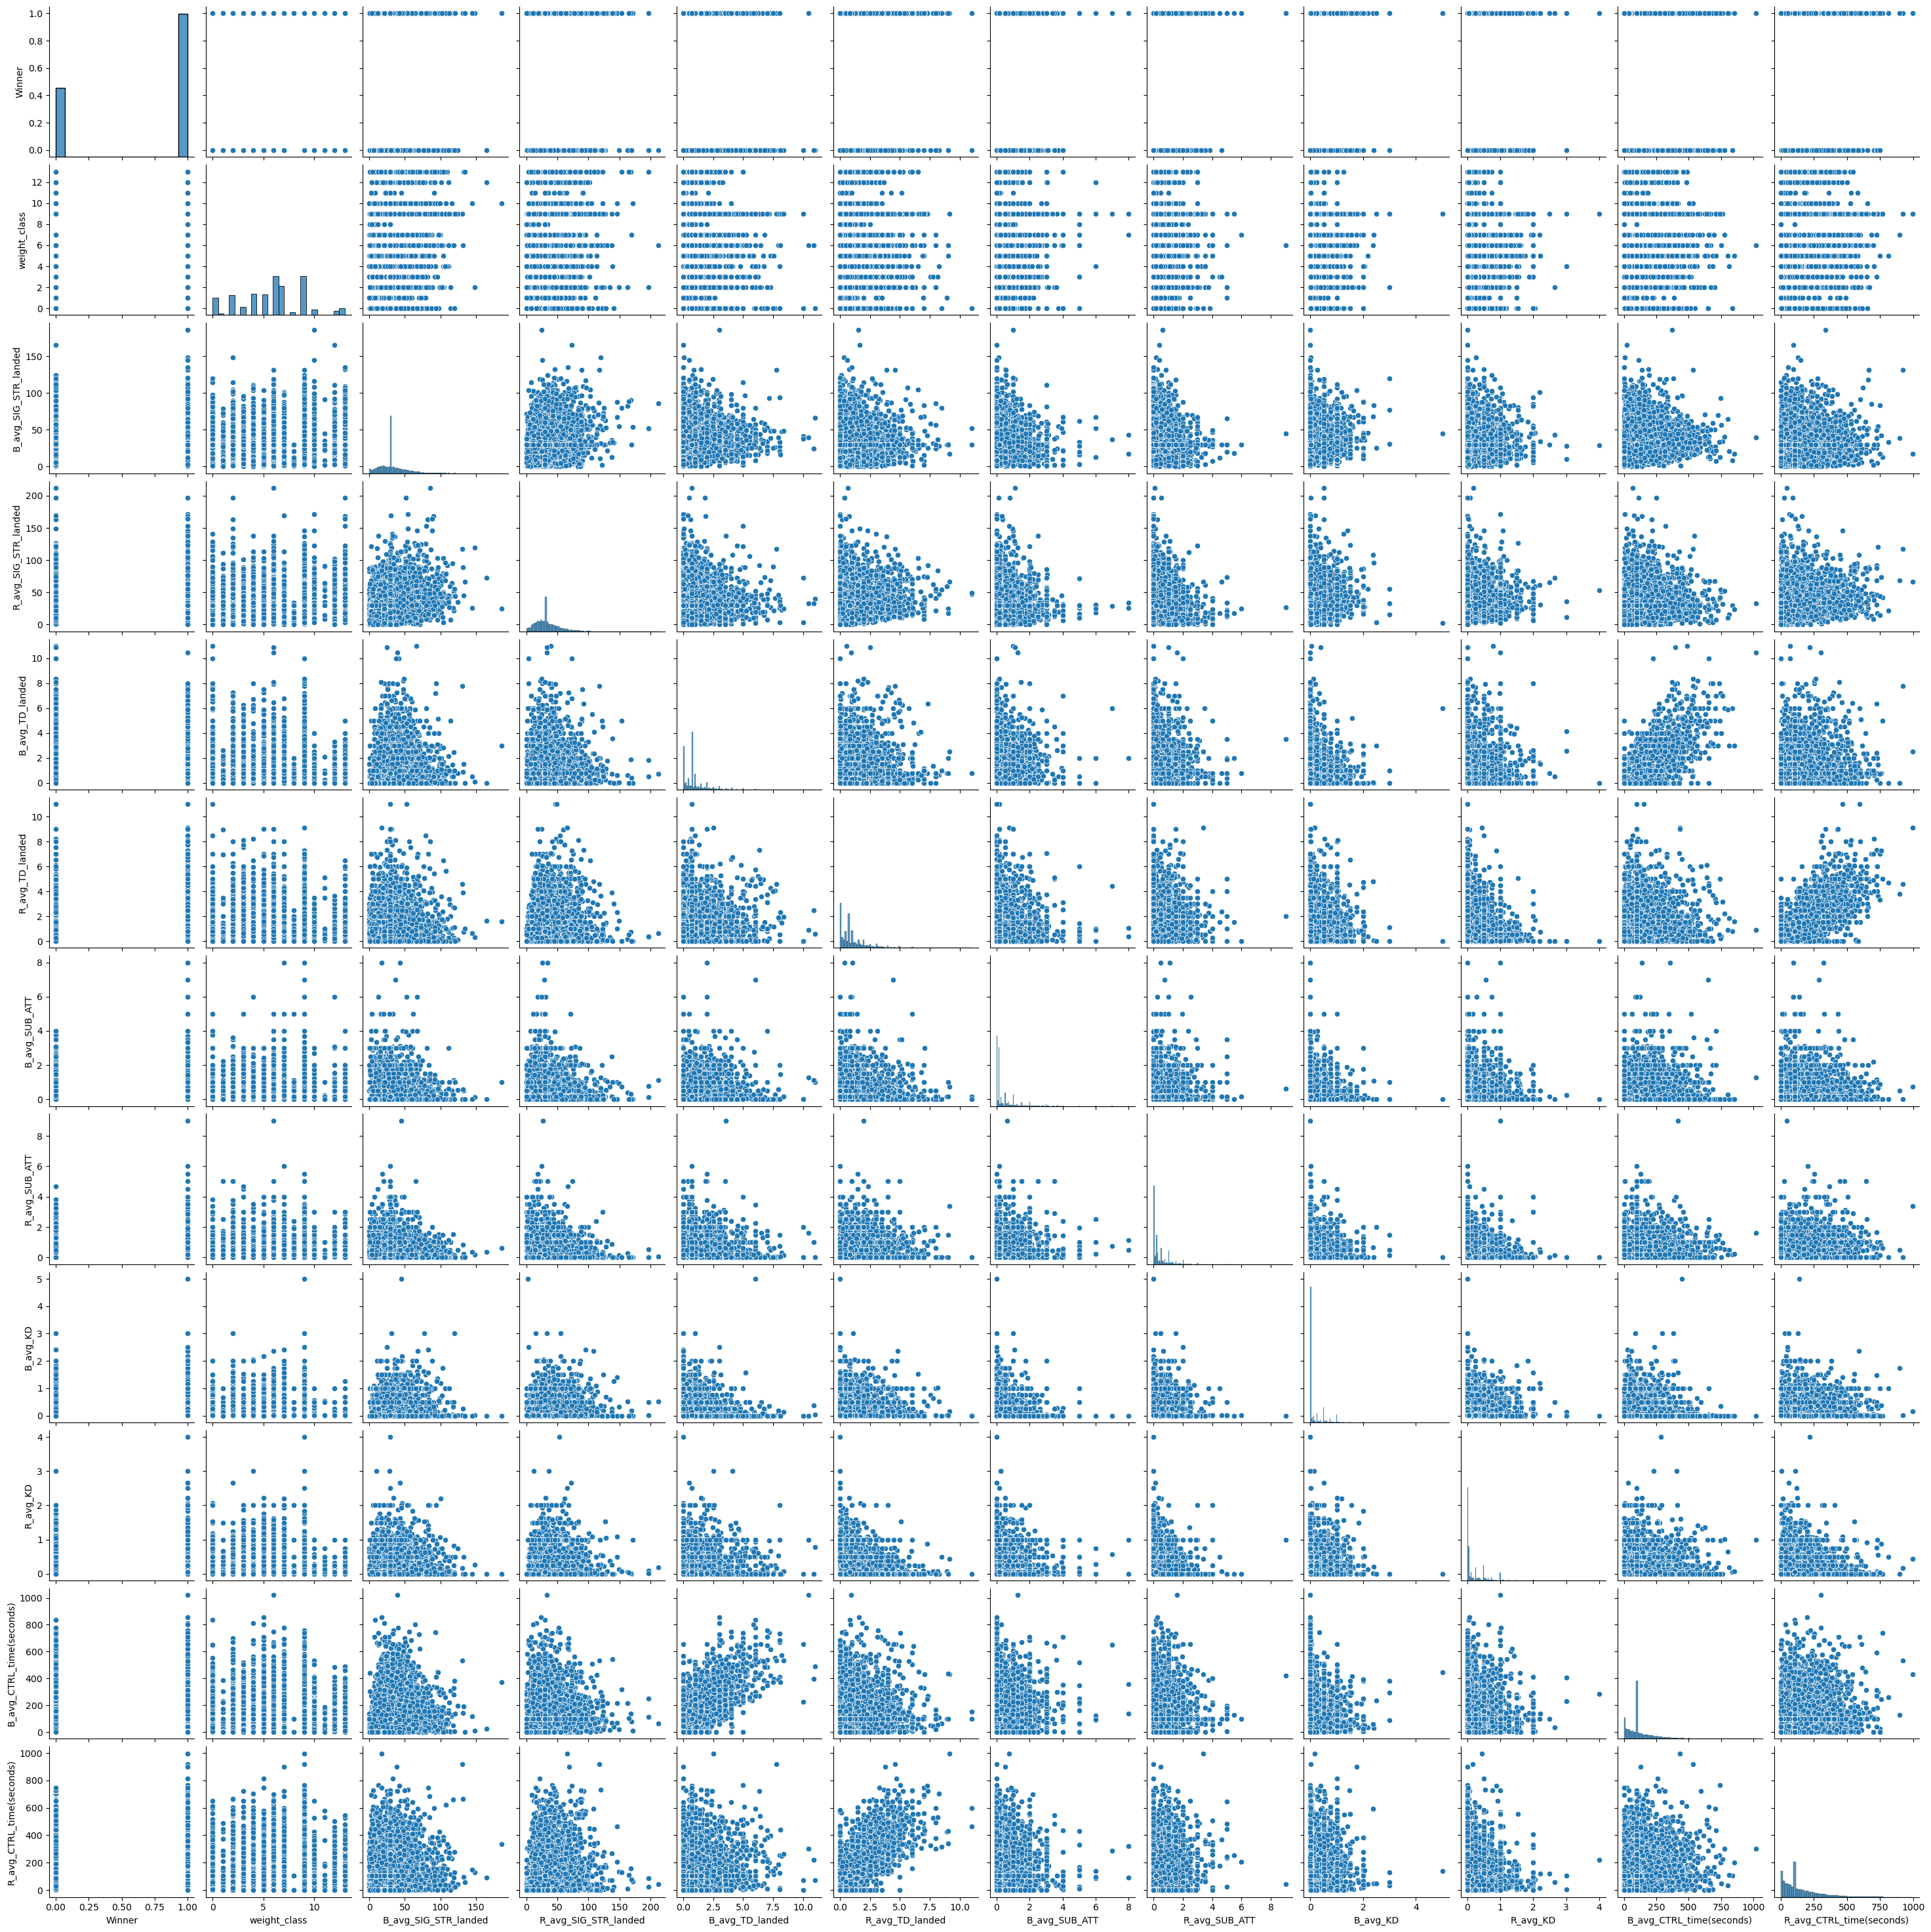

In [16]:
# Create the pair plot
sns.pairplot(df_pairplot)
plt.show()

### Analysis of Pair Plot

The pair plot displays pairwise relationships between all the selected variables along with their distributions on the diagonal. Here's a detailed analysis:

#### Distributions of Variables

1. **Winner:**
   - **Binary Distribution:** The variable is binary, with 1 indicating a win for the red corner and 0 for the blue corner. The distribution shows the frequency of wins for each corner, with a fairly balanced distribution.

2. **weight_class:**
   - **Categorical Distribution:** The weight class variable, converted to numerical codes, shows varying frequencies. This indicates different numbers of fighters in each weight class, with some classes having more representation.

3. **B_avg_SIG_STR_landed and R_avg_SIG_STR_landed:**
   - **Right-Skewed Distributions:** Both variables are right-skewed, with most values clustered at lower ranges. This suggests that fights typically involve fewer significant strikes landed.

4. **B_avg_TD_landed and R_avg_TD_landed:**
   - **Right-Skewed Distributions:** Similar to significant strikes, the number of takedowns landed is typically low, with fewer instances of high takedowns.

5. **B_avg_SUB_ATT and R_avg_SUB_ATT:**
   - **Right-Skewed Distributions:** Submission attempts are mostly low, indicating that aggressive submission strategies are less common.

6. **B_avg_KD and R_avg_KD:**
   - **Highly Right-Skewed Distributions:** Knockdowns are relatively rare, with most values being zero, indicating that knockdowns are infrequent in most fights.

7. **B_avg_CTRL_time(seconds) and R_avg_CTRL_time(seconds):**
   - **Right-Skewed Distributions:** Control time is also typically low, with some instances of higher control times indicating fights where one fighter dominated control.

#### Pairwise Relationships

1. **Winner vs. Performance Metrics:**
   - **Winner vs. B_avg_SIG_STR_landed / R_avg_SIG_STR_landed:** The scatterplots suggest that a higher number of significant strikes by either corner does not strongly correlate with winning.
   - **Winner vs. B_avg_TD_landed / R_avg_TD_landed:** Similarly, there is no strong relationship between the number of takedowns and winning.

2. **Inter-Metric Relationships:**
   - **B_avg_SIG_STR_landed vs. B_avg_TD_landed / R_avg_TD_landed:** There is a weak correlation between significant strikes and takedowns, suggesting varied fighting strategies.
   - **B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds):** The scatterplot shows a cluster of low control times for both corners, with some instances of one corner having significantly higher control time, indicating dominant control in those fights.

### Variables to Explore Further

1. **Winner vs. B_avg_SIG_STR_landed / R_avg_SIG_STR_landed:**
   - **Reason:** Understanding how significant strikes impact the likelihood of winning can provide insights into striking effectiveness.

2. **Winner vs. B_avg_TD_landed / R_avg_TD_landed:**
   - **Reason:** Analyzing the influence of takedowns on fight outcomes can help understand the role of grappling in winning.

3. **B_avg_CTRL_time(seconds) vs. R_avg_CTRL_time(seconds):**
   - **Reason:** Exploring control time dynamics can reveal patterns where one fighter's dominance in control time correlates with winning, shedding light on the importance of control in fights.

4. **B_avg_SUB_ATT vs. R_avg_SUB_ATT:**
   - **Reason:** Investigating submission attempts can help identify if aggressive submission strategies are effective in securing wins.

### Next Steps

- **Focused Analysis:** Perform detailed statistical analyses and visualizations on the identified variables to derive actionable insights.
- **Advanced Techniques:** Use advanced analytical techniques such as machine learning to build predictive models and identify patterns and predictors of fight outcomes.


# Categorical Plot

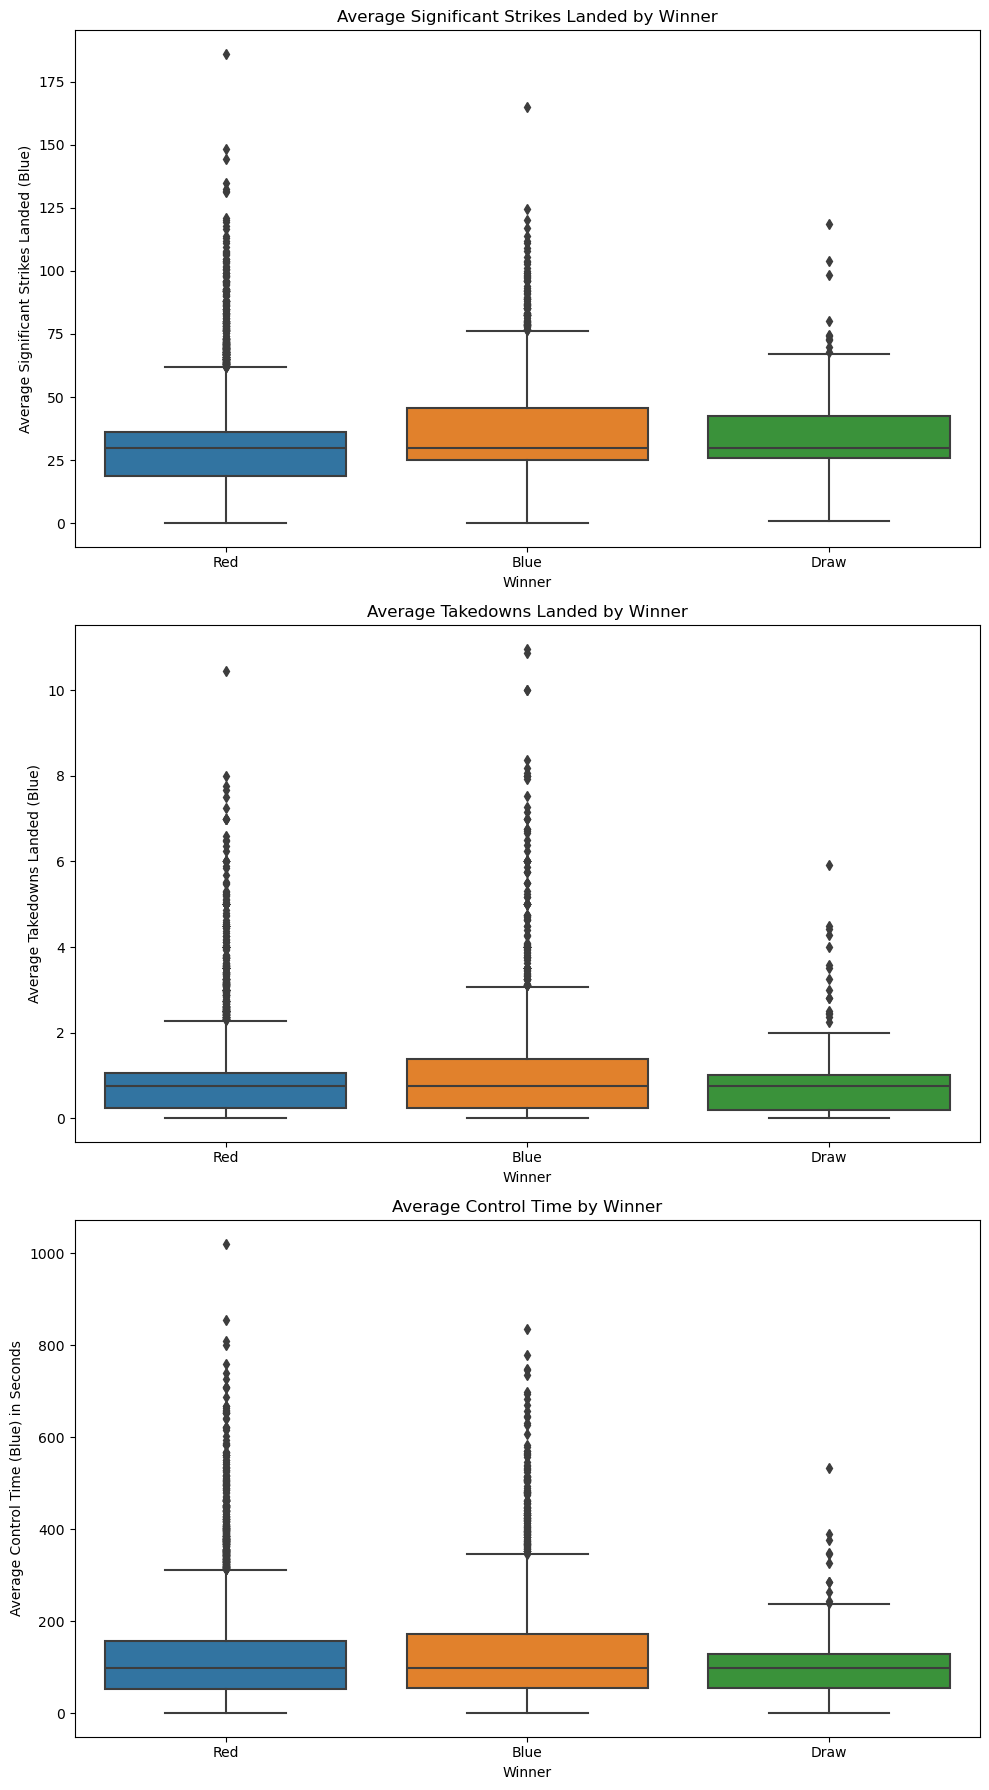

In [18]:
# Create categorical plots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: B_avg_SIG_STR_landed vs. Winner
sns.boxplot(x='Winner', y='B_avg_SIG_STR_landed', data=ufc_data, ax=axes[0])
axes[0].set_title('Average Significant Strikes Landed by Winner')
axes[0].set_xlabel('Winner')
axes[0].set_ylabel('Average Significant Strikes Landed (Blue)')

# Plot 2: B_avg_TD_landed vs. Winner
sns.boxplot(x='Winner', y='B_avg_TD_landed', data=ufc_data, ax=axes[1])
axes[1].set_title('Average Takedowns Landed by Winner')
axes[1].set_xlabel('Winner')
axes[1].set_ylabel('Average Takedowns Landed (Blue)')

# Plot 3: B_avg_CTRL_time(seconds) vs. Winner
sns.boxplot(x='Winner', y='B_avg_CTRL_time(seconds)', data=ufc_data, ax=axes[2])
axes[2].set_title('Average Control Time by Winner')
axes[2].set_xlabel('Winner')
axes[2].set_ylabel('Average Control Time (Blue) in Seconds')

plt.tight_layout()
plt.show()

### Interpretation of Results

#### Plot 1: Average Significant Strikes Landed by Winner
- **Overview:** This box plot shows the distribution of average significant strikes landed by the blue corner, categorized by the fight winner (Red, Blue, or Draw).
- **Observations:**
  - The median number of significant strikes landed is higher for fights won by the blue corner compared to those won by the red corner or ending in a draw.
  - The variability (interquartile range) is similar across all categories, indicating a consistent spread of values.
  - There are more outliers in the blue corner wins, suggesting some fights with exceptionally high significant strikes landed.

#### Plot 2: Average Takedowns Landed by Winner
- **Overview:** This box plot displays the distribution of average takedowns landed by the blue corner, categorized by the fight winner.
- **Observations:**
  - The median number of takedowns landed by the blue corner is slightly higher in fights won by the blue corner compared to those won by the red corner or ending in a draw.
  - There is a higher variability in takedowns landed for fights won by the blue corner, with several outliers indicating high takedown counts in some fights.
  - The median number of takedowns is relatively low across all categories, indicating that takedowns are generally less frequent.

#### Plot 3: Average Control Time by Winner
- **Overview:** This box plot shows the distribution of average control time by the blue corner, categorized by the fight winner.
- **Observations:**
  - The median control time for the blue corner is higher in fights won by the blue corner compared to those won by the red corner or ending in a draw.
  - The variability is similar across all categories, with a higher number of outliers in fights won by the blue corner, indicating instances of dominant control.

### Summary
- **Significant Strikes:** Higher average significant strikes landed by the blue corner are associated with winning, with the blue corner showing a higher median and more outliers in wins.
- **Takedowns:** A higher number of takedowns by the blue corner is associated with wins, although the median remains low across all categories.
- **Control Time:** Control time appears to be a significant factor, with higher median control times correlating with wins for the blue corner.

### Next Steps
- **Further Analysis:** Explore additional performance metrics and their relationship with fight outcomes to gain deeper insights.
- **Advanced Techniques:** Utilize machine learning models to identify patterns and predictors of fight outcomes based on these metrics.


# Conclusion

### Revisiting the Questions

#### Original Questions

1. **What factors most significantly influence the outcome of a fight (win/loss)?**
   - **Answer:** Based on the exploratory data analysis conducted so far, the following factors seem to influence the outcome of a fight:
     - **Significant Strikes Landed:** Higher average significant strikes landed by the blue corner are associated with winning.
     - **Takedowns Landed:** A higher number of takedowns by the blue corner is also associated with winning.
     - **Control Time:** Control time appears to be a significant factor, with higher control times correlating with winning for the blue corner.

2. **How do fight statistics vary across different weight classes?**
   - **Answer:** This question hasn't been specifically addressed in the analysis conducted so far. Further analysis focusing on the weight classes and comparing the fight statistics across different weight categories is needed.

3. **Are there geographical trends in fight outcomes?**
   - **Answer:** This question hasn't been specifically addressed in the analysis conducted so far. To answer this, we need to analyze the location data and look for patterns in fight outcomes based on geographical locations.

4. **Can we predict the winner of a fight based on historical data?**
   - **Answer:** The exploratory analysis suggests that significant strikes landed, takedowns, and control time are correlated with winning. However, a predictive model would need to be developed and validated to make reliable predictions about fight outcomes based on historical data.

5. **How have fight outcomes evolved over time?**
   - **Answer:** This question hasn't been specifically addressed in the analysis conducted so far. To answer this, we need to analyze the date data and look for trends in fight outcomes over time.

#### New Questions Based on Early Findings

1. **Do certain fight metrics (e.g., significant strikes, takedowns, control time) have different levels of importance in different weight classes?**
   - **Rationale:** The impact of these metrics might vary depending on the weight class, and it would be insightful to understand if certain metrics are more critical in specific categories.

2. **Is there a difference in fight outcomes between orthodox and southpaw fighters?**
   - **Rationale:** The stance of a fighter could influence the fight outcome, and it would be interesting to explore this aspect.

3. **Are there specific referees whose fights have a higher likelihood of ending in a particular way (e.g., more knockouts, more decisions)?**
   - **Rationale:** The role of the referee might influence the fight dynamics and outcomes, and analyzing this could reveal interesting patterns.

4. **What is the distribution of fight outcomes (win/loss/draw) in title bouts versus non-title bouts?**
   - **Rationale:** Title bouts might have different dynamics compared to regular fights, and exploring this could provide additional insights.

5. **How do fighters' win streaks and lose streaks impact their performance metrics?**
   - **Rationale:** Analyzing the performance metrics in the context of win and lose streaks could reveal how momentum impacts fighter performance.

### Next Steps

- **Conduct Further Analysis:** Address the unanswered original questions and explore the new questions generated based on the early findings.
- **Develop Predictive Models:** Use machine learning techniques to create models that can predict fight outcomes based on historical data.
- **Explore Additional Metrics:** Delve deeper into other metrics such as fighter stance, referee influence, and title bouts to gain a comprehensive understanding of the factors influencing fight outcomes.



# Hypotheses

### Hypotheses

Based on the exploratory analysis conducted so far, we can define the following hypotheses to be tested later:

#### Hypothesis 1
- **Null Hypothesis (H0):** There is no significant difference in the average number of significant strikes landed between winning and losing fighters.
- **Alternative Hypothesis (H1):** Winning fighters have a significantly higher average number of significant strikes landed compared to losing fighters.

#### Hypothesis 2
- **Null Hypothesis (H0):** There is no significant difference in the average number of takedowns landed between winning and losing fighters.
- **Alternative Hypothesis (H1):** Winning fighters have a significantly higher average number of takedowns landed compared to losing fighters.

#### Hypothesis 3
- **Null Hypothesis (H0):** There is no significant difference in the average control time between winning and losing fighters.
- **Alternative Hypothesis (H1):** Winning fighters have a significantly higher average control time compared to losing fighters.

#### Hypothesis 4
- **Null Hypothesis (H0):** The distribution of fight outcomes (win/loss) does not vary significantly across different weight classes.
- **Alternative Hypothesis (H1):** The distribution of fight outcomes (win/loss) varies significantly across different weight classes.

#### Hypothesis 5
- **Null Hypothesis (H0):** There is no significant difference in fight outcomes between orthodox and southpaw fighters.
- **Alternative Hypothesis (H1):** There is a significant difference in fight outcomes between orthodox and southpaw fighters.

#### Hypothesis 6
- **Null Hypothesis (H0):** The geographical location of the fight does not significantly impact the fight outcome.
- **Alternative Hypothesis (H1):** The geographical location of the fight significantly impacts the fight outcome.

#### Hypothesis 7
- **Null Hypothesis (H0):** There is no significant difference in the distribution of fight outcomes (win/loss/draw) between title bouts and non-title bouts.
- **Alternative Hypothesis (H1):** There is a significant difference in the distribution of fight outcomes (win/loss/draw) between title bouts and non-title bouts.

#### Hypothesis 8
- **Null Hypothesis (H0):** Fighters' win streaks and lose streaks do not significantly impact their performance metrics (e.g., significant strikes landed, takedowns, control time).
- **Alternative Hypothesis (H1):** Fighters' win streaks and lose streaks significantly impact their performance metrics (e.g., significant strikes landed, takedowns, control time).

### Next Steps

- **Data Collection and Preparation:** Ensure all relevant data is collected and properly cleaned for hypothesis testing.
- **Statistical Analysis:** Use appropriate statistical tests (e.g., t-tests, ANOVA, chi-square tests) to test the hypotheses.
- **Model Development:** Develop predictive models based on the significant factors identified through hypothesis testing.
- **Further Exploration:** Continue exploring additional questions and metrics to gain deeper insights into fight outcomes.


